# 3. Data Modeling

## 3.1 Import Data

**Analysis Questions:**

Q1. From a traveler's perspective, does a "superhost" enhance the guest experience?

Q2. What features have the most influence on the success and profitability of an Airbnb listing from an investor's standpoint?

Q3. How significantly do customer reviews influence the booking frequency of a listing?

In [1]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
import statsmodels.stats.multitest as multi


import func

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)

In [2]:
# Import cleaned dataframes
df_listings = pd.read_pickle('../data/listings.pkl')
df_reviews = pd.read_pickle('../data/reviews.pkl')

In [3]:
# One-hot encode catagory features
cat_cols = df_listings.select_dtypes('category').columns.tolist()

for col in cat_cols:
    dummies = pd.get_dummies(df_listings[col], prefix=col)
    df_listings = pd.concat([df_listings, dummies], axis=1)
    df_listings.drop(col, axis=1,inplace=True)

In [4]:
# Merge data
df_reviews.listing_id = df_reviews.listing_id.astype('str')
df_full = df_listings.merge(df_reviews, left_on='id', right_on='listing_id')

## 3.2 From a traveler's perspective, does a "superhost" enhance the guest experience?

In [6]:
# Calculate feature p values
group = 'host_is_superhost'
num_cols = df_listings.select_dtypes(exclude=['object']).columns
test_results = []

for col in num_cols:
    if col=="host_is_superhost":
        continue
    else:
        test_results.append(func.bootstrap_t_pvalue(df_listings, group, col))

# Display the t-test result
test_results = pd.DataFrame(test_results,columns=['feature','pvalue','statistics'])

In [12]:
# plot signifigance
multitest_result = multi.multipletests(test_results.pvalue,method="bonferroni")
test_results['significant'],test_results['adjusted_pvalue']=multitest_result[0],multitest_result[1]
test_results.sort_values(['significant','pvalue'],ascending=[False,True]).style.bar(subset='statistics', align='zero', color=['#d65f5f', '#5fba7d'])

,feature,pvalue,statistics,significant,adjusted_pvalue
1,host_response_rate,0.000000,14.092996,True,0.000000
3,host_has_profile_pic,0.000000,2.452137,True,0.000000
4,host_identity_verified,0.000000,7.996837,True,0.000000
17,extra_people,0.000000,4.115656,True,0.000000
20,number_of_reviews,0.000000,10.096419,True,0.000000
21,review_scores_rating,0.000000,23.963470,True,0.000000
22,review_scores_accuracy,0.000000,21.528450,True,0.000000
23,review_scores_cleanliness,0.000000,20.308684,True,0.000000
24,review_scores_checkin,0.000000,17.516334,True,0.000000
25,review_scores_communication,0.000000,18.979648,True,0.000000


In [19]:
# What % of statistically significant features are amenities?
test_results.feature[test_results.significant==True].str.contains('amenity').sum()/np.sum(test_results.significant==True)

0.47368421052631576

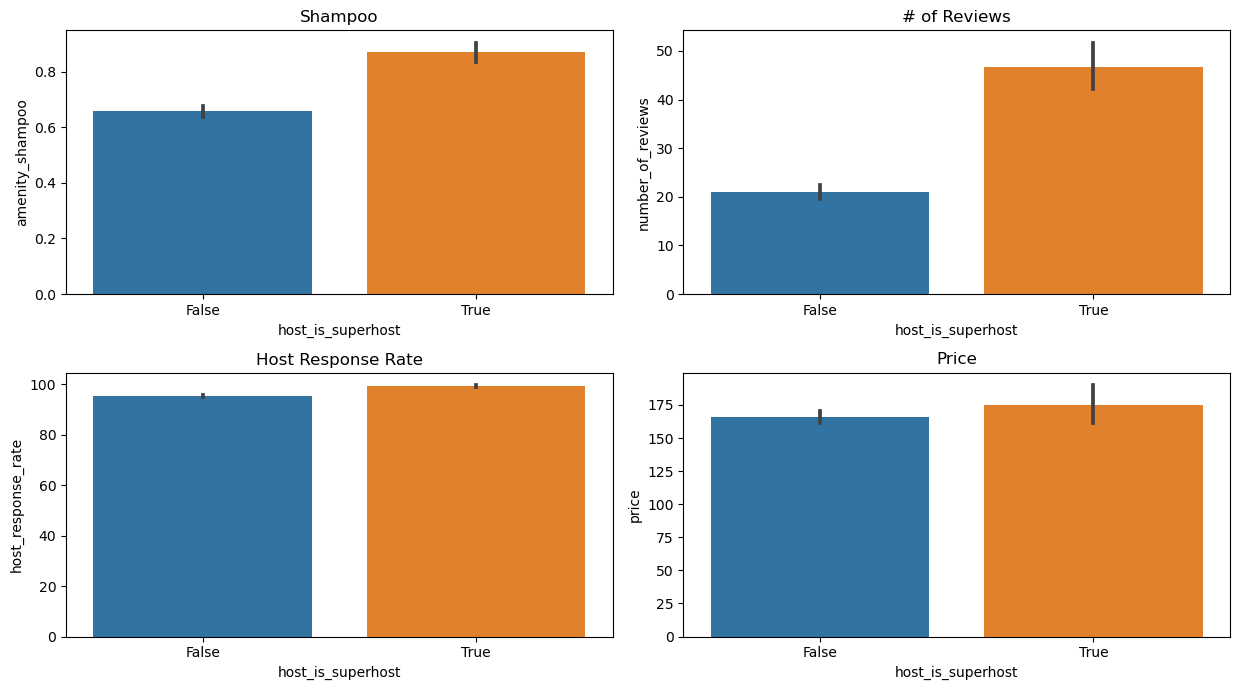

In [34]:
# Explore significant features
plt.subplots(figsize=(12.5, 7))

plt.subplot(221)
sns.barplot(data=df_listings,y="amenity_shampoo",x="host_is_superhost")
plt.title("Shampoo")

plt.subplot(222)
sns.barplot(data=df_listings,y="number_of_reviews",x="host_is_superhost")
plt.title("# of Reviews")

plt.subplot(223)
sns.barplot(data=df_listings,y="host_response_rate",x="host_is_superhost")
plt.title("Host Response Rate")

plt.subplot(224)
sns.barplot(data=df_listings,y="price",x="host_is_superhost")
plt.title("Price")
plt.tight_layout();


**Do "superhosts" enhance the guest experience?**

In comparing super hosts to others, amenities stood out as key differences. Surprisingly, 47% of significant features were amenities. Most of the ameneties that made the cut had to do with convenience and safety for short-term stays, like 'wireless_internet', 'free_parking', 'smoke_detector', 'essentials', and 'shampoo'. Amenities like fireplace, doorman, kitchen, and gym weren't important. I guess people aren't trying to stay fit on vacation lol.

When analyzing some of the significant features more closely we saw a couple of insights. 

Super hosts often get more and better reviews than other hosts, likely because they respond quickly and focus on safety, including verifying themselves and their guests on various platforms. And despite the high quality of super hosts' properties, they don't necessarily charge more. 

To conclude, the answer to are first question is a clear yes! Booking with super hosts can give you a better stay without extra costs. That means they're likely in higher demand and you should book them earlier.